檔名:(您的學號)_hw3.ipynb

一.載入資料集:https://www.kaggle.com/datasets/lara311/flowers-five-classes (10分)

In [3]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dispitpit","key":"6c239343ee9115f181acd4f6a49deb67"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# 下載資料集壓縮檔
!kaggle datasets download lara311/flowers-five-classes

Dataset URL: https://www.kaggle.com/datasets/lara311/flowers-five-classes
License(s): apache-2.0
 91% 144M/158M [00:00<00:00, 463MB/s] 
100% 158M/158M [00:00<00:00, 503MB/s]


In [6]:
# 創建自料夾並解壓縮
! mkdir flowers-five-classes
! unzip flowers-five-classes.zip -d flowers-five-classes

Archive:  flowers-five-classes.zip
  inflating: flowers-five-classes/train/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers-five-classes/train/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers-five-classes/train/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers-five-classes/train/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers-five-classes/train/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers-five-classes/train/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers-five-classes/train/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers-five-classes/train/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers-five-classes/train/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers-five-classes/train/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers-five-classes/train/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers-five-classes/train/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers-five-classes/train/daisy/105558265

二.視覺化每個類別的第一張圖和各自的真實標籤(10分)

In [9]:
# 載入相關函式庫
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [10]:
# 查看解壓縮完的內容
root_dir = 'flowers-five-classes'
for root, dirs, files in os.walk(root_dir):
    print(f"目錄：{root}")
    for name in dirs:
        print(f" 子目錄：{name}")

目錄：flowers-five-classes
 子目錄：train
目錄：flowers-five-classes/train
 子目錄：dandelion
 子目錄：sunflower
 子目錄：rose
 子目錄：tulip
 子目錄：daisy
目錄：flowers-five-classes/train/dandelion
目錄：flowers-five-classes/train/sunflower
目錄：flowers-five-classes/train/rose
目錄：flowers-five-classes/train/tulip
目錄：flowers-five-classes/train/daisy


In [11]:
# 查看資料相關資訊
data_dir = 'flowers-five-classes/train'

categories = os.listdir(data_dir) #列出子目錄
print(f"number of labels: {len(categories)}")
print(f"labels：{categories}")

# 統計每個類別的資料量
labels_count = {}
for category in categories:
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        labels_count[category] = len(os.listdir(category_path))

# 轉成DataFrame
df = pd.DataFrame(list(labels_count.items()), columns=['Label', 'Number of Images'])
print("\n")
print(df)

number of labels: 5
labels：['dandelion', 'sunflower', 'rose', 'tulip', 'daisy']


       Label  Number of Images
0  dandelion               646
1  sunflower               495
2       rose               497
3      tulip               607
4      daisy               501


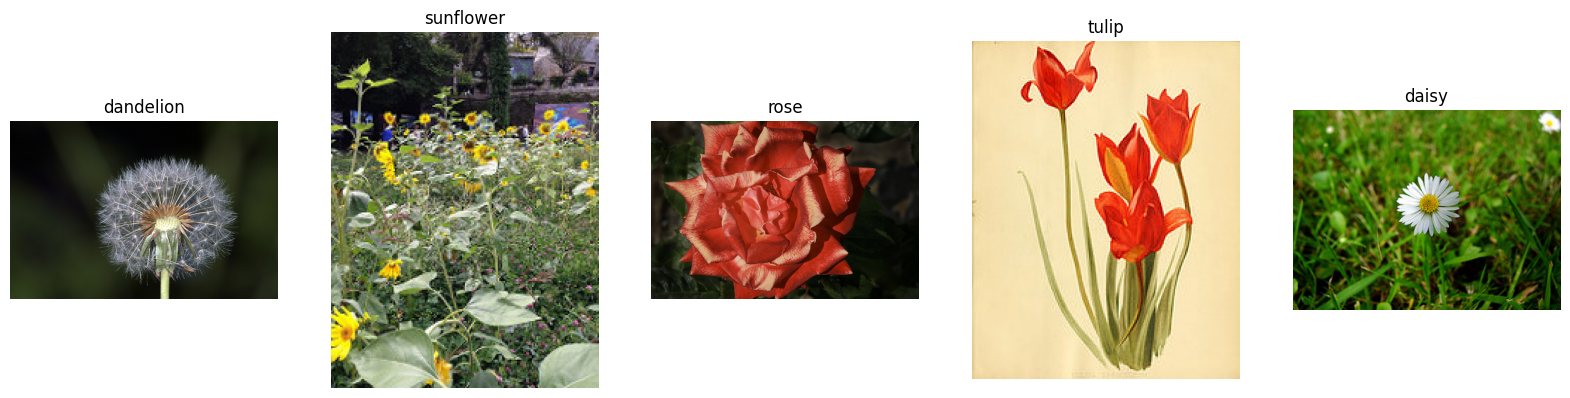

In [12]:
# 視覺化每個類別的第一張圖和各自的真實標籤
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, category in enumerate(categories):
    if i >= 5:
        break
    category_path = os.path.join(data_dir, category)
    image_files = os.listdir(category_path)
    if len(image_files) > 0:
        image_path = os.path.join(category_path, image_files[0])
        image = Image.open(image_path)

        axes[i].imshow(image)
        axes[i].set_title(category)
        axes[i].axis('off')
plt.show()


三.使用resnet18模型推論每種類別的前五張圖片,顯示出圖片、真實標籤和預測標籤(10分)

In [13]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [14]:
# 載入相關函式庫
import json
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import urllib.request
import cv2

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 30.6MB/s]


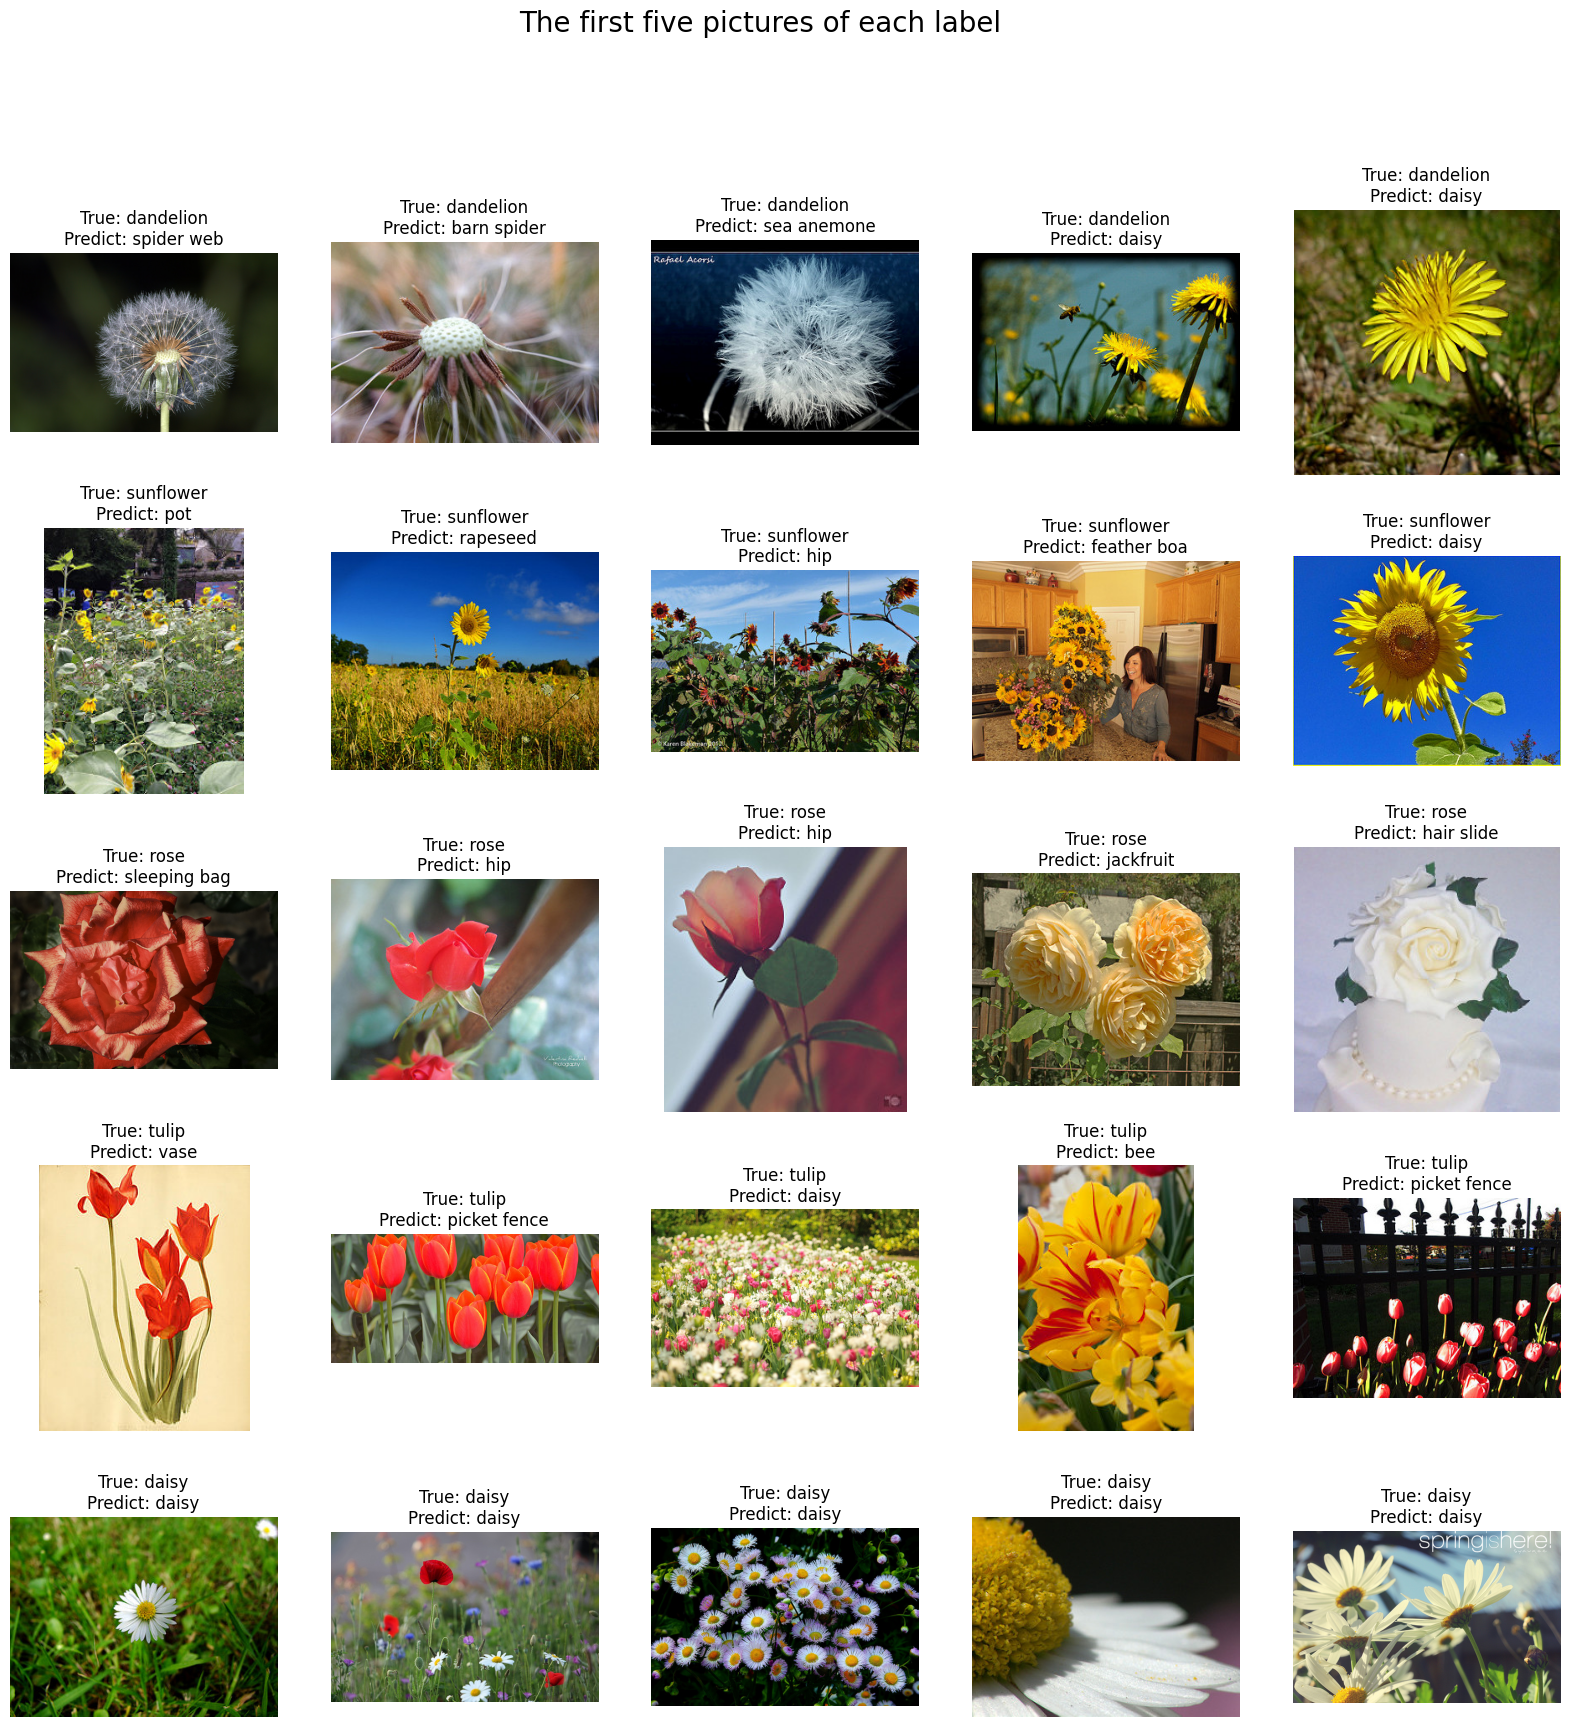

In [15]:
# 下載ImageNet
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
urllib.request.urlretrieve(url, "imagenet_classes.txt")

# 類別名稱
with open("imagenet_classes.txt") as f:
    class_names = [line.strip() for line in f.readlines()]

device = torch.device("cpu")
# ResNet-18
model = models.resnet18(pretrained=True)
model = model.to(device)
model.eval()

# transform
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# picture
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle("The first five pictures of each label", fontsize=20)

# 前五張圖片和真實、預測標籤
for row_idx, category in enumerate(categories):
    if row_idx >= 5:
        break
    category_path = os.path.join(data_dir, category)
    image_files = os.listdir(category_path)[:5]

    for col_idx, image_file in enumerate(image_files):
        image_path = os.path.join(category_path, image_file)
        image = Image.open(image_path)

        input_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            _, predicted_idx = torch.max(output, 1)
            predicted_label = class_names[predicted_idx.item()]

        axes[row_idx, col_idx].imshow(image)
        axes[row_idx, col_idx].set_title(f"True: {category}\nPredict: {predicted_label}")
        axes[row_idx, col_idx].axis('off')
plt.show()

四.使用resnet18模型,修改輸出層為5個類別並推論資料集的所有圖片,計算並顯示出Accuracy和Rank 2 Accuracy(10分)

In [16]:
# 載入相關函式庫
import torch.nn as nn
from sklearn.metrics import accuracy_score

In [17]:
device = torch.device("cpu")
# 修改輸出層
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 5) #類別為5
model = model.to(device)
model.eval()


data_dir = 'flowers-five-classes/train'
categories = sorted(os.listdir(data_dir))  # sort
label_to_index = {label: idx for idx, label in enumerate(categories)}

all_true_labels = [] # true labels
all_predictions = [] # prefictions labels

# Rank 2 預測
rank_2_correct_count = 0
total_images = 0

for category in categories:
    category_path = os.path.join(data_dir, category)
    image_files = os.listdir(category_path)
    true_label = label_to_index[category]

    for image_file in image_files:
        image_path = os.path.join(category_path, image_file)
        image = Image.open(image_path)

        input_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            probabilities = torch.softmax(output, dim=1)
            top_2_preds = torch.topk(probabilities, 2, dim=1).indices[0].tolist()

        all_true_labels.append(true_label)
        all_predictions.append(top_2_preds[0])

        if true_label in top_2_preds:
            rank_2_correct_count += 1
        total_images += 1

# Accuracy和Rank 2 Accuracy
print('Result\n')
print(f"Accuracy: {accuracy_score(all_true_labels, all_predictions) * 100:.2f}%")
print(f"Rank 2 Accuracy: {(rank_2_correct_count / total_images) * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Result

Accuracy: 18.24%
Rank 2 Accuracy: 37.69%


五.資料預處理且將資料集分割成80% 訓練集, 10% 驗證集, 10% 測試集(10分)

In [18]:
# 載入程式庫
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

In [19]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
# 分割資料集
total_size = len(dataset)
train_size = int(0.8 * total_size) #train set 80%
val_size = int(0.1 * total_size) #validation set 10%
test_size = total_size - train_size - val_size #test set

# random
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train set size: {train_size}")
print(f"Validation set size: {val_size}")
print(f"Test set size: {test_size}")


Train set size: 2196
Validation set size: 274
Test set size: 276


六:微調resnet18模型,修改輸出層為5個類別並設置learning rate scheduler和Checkpoint -> saving the best model,請顯示出訓練過程,包含每個epoh的Train Accuracy和validation accuracy,以及Checkpoint的狀況(25分)

In [20]:
# 載入程式庫
import torch.optim as optim
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [ ]:
# ResNet-18
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 5)
model = model.to(device)

# function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# save best model
best_val_accuracy = 0.0
checkpoint_path = "best_model.pth"


# train
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_correct = 0
    train_total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accuracy
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = train_correct / train_total

    # validation
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = val_correct / val_total

    # update
    scheduler.step()

    # save best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), "flower_model.pth")
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Checkpoint: Saved best model with validation accuracy: {val_accuracy * 100:.2f}%")

    # Epoch
    print(f"Epoch {epoch + 1}/{num_epochs}: Train Accuracy: {train_accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

print("done")


Epoch 1/20: 100%|██████████| 69/69 [07:43<00:00,  6.71s/it]


Checkpoint: Saved best model with validation accuracy: 63.50%
Epoch 1/20: Train Accuracy: 77.32%, Validation Accuracy: 63.50%


Epoch 2/20: 100%|██████████| 69/69 [07:28<00:00,  6.51s/it]


Checkpoint: Saved best model with validation accuracy: 77.01%
Epoch 2/20: Train Accuracy: 81.92%, Validation Accuracy: 77.01%


Epoch 3/20: 100%|██████████| 69/69 [07:32<00:00,  6.56s/it]


Checkpoint: Saved best model with validation accuracy: 81.02%
Epoch 3/20: Train Accuracy: 89.03%, Validation Accuracy: 81.02%


Epoch 4/20: 100%|██████████| 69/69 [07:41<00:00,  6.70s/it]


Checkpoint: Saved best model with validation accuracy: 82.48%
Epoch 4/20: Train Accuracy: 90.03%, Validation Accuracy: 82.48%


Epoch 5/20: 100%|██████████| 69/69 [07:43<00:00,  6.71s/it]


Epoch 5/20: Train Accuracy: 91.94%, Validation Accuracy: 82.12%


Epoch 6/20: 100%|██████████| 69/69 [07:33<00:00,  6.57s/it]


Checkpoint: Saved best model with validation accuracy: 87.23%
Epoch 6/20: Train Accuracy: 95.49%, Validation Accuracy: 87.23%


Epoch 7/20: 100%|██████████| 69/69 [07:29<00:00,  6.51s/it]


Checkpoint: Saved best model with validation accuracy: 88.32%
Epoch 7/20: Train Accuracy: 97.81%, Validation Accuracy: 88.32%


Epoch 8/20: 100%|██████████| 69/69 [07:29<00:00,  6.52s/it]


Checkpoint: Saved best model with validation accuracy: 89.05%
Epoch 8/20: Train Accuracy: 98.77%, Validation Accuracy: 89.05%


Epoch 9/20: 100%|██████████| 69/69 [07:27<00:00,  6.48s/it]


Checkpoint: Saved best model with validation accuracy: 89.78%
Epoch 9/20: Train Accuracy: 99.50%, Validation Accuracy: 89.78%


Epoch 10/20: 100%|██████████| 69/69 [07:25<00:00,  6.46s/it]


Checkpoint: Saved best model with validation accuracy: 90.15%
Epoch 10/20: Train Accuracy: 99.59%, Validation Accuracy: 90.15%


Epoch 11/20: 100%|██████████| 69/69 [07:28<00:00,  6.49s/it]


Checkpoint: Saved best model with validation accuracy: 90.51%
Epoch 11/20: Train Accuracy: 99.68%, Validation Accuracy: 90.51%


Epoch 12/20: 100%|██████████| 69/69 [07:30<00:00,  6.53s/it]


Epoch 12/20: Train Accuracy: 99.68%, Validation Accuracy: 89.78%


Epoch 13/20: 100%|██████████| 69/69 [07:26<00:00,  6.47s/it]


Epoch 13/20: Train Accuracy: 99.59%, Validation Accuracy: 89.05%


Epoch 14/20: 100%|██████████| 69/69 [07:20<00:00,  6.38s/it]


Epoch 14/20: Train Accuracy: 99.73%, Validation Accuracy: 89.42%


Epoch 15/20: 100%|██████████| 69/69 [07:23<00:00,  6.42s/it]


Epoch 15/20: Train Accuracy: 99.59%, Validation Accuracy: 90.15%


Epoch 16/20: 100%|██████████| 69/69 [07:20<00:00,  6.38s/it]


Epoch 16/20: Train Accuracy: 99.68%, Validation Accuracy: 90.15%


Epoch 17/20: 100%|██████████| 69/69 [07:24<00:00,  6.45s/it]


Epoch 17/20: Train Accuracy: 99.82%, Validation Accuracy: 89.78%


Epoch 18/20: 100%|██████████| 69/69 [07:23<00:00,  6.43s/it]


Epoch 18/20: Train Accuracy: 99.73%, Validation Accuracy: 89.78%


Epoch 19/20: 100%|██████████| 69/69 [07:25<00:00,  6.46s/it]


Checkpoint: Saved best model with validation accuracy: 90.88%
Epoch 19/20: Train Accuracy: 99.64%, Validation Accuracy: 90.88%


Epoch 20/20:  30%|███       | 21/69 [02:15<05:10,  6.46s/it]

七.顯示出Accuracy和Rank-2 Accuracy(10分)

In [ ]:
# Accuracy 和 Rank-2 Accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
rank_2_accuracy = rank_2_correct_count / total_images

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Rank-2 Accuracy: {rank_2_accuracy * 100:.2f}%")


八.使用微調完的resnet18模型推論測試集每種類別的前五張圖片,顯示出圖片、真實標籤和預測標籤(15分)

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
categories = sorted(os.listdir(data_dir))
category_count = {category: 0 for category in categories}

# set frame
fig, axes = plt.subplots(len(categories), 5, figsize=(20, len(categories) * 4))
fig.suptitle("The top five images of each category in the test set", fontsize=20)

# picture
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        true_label = categories[labels.item()]
        predicted_label = categories[predicted.item()]

        if category_count[true_label] < 5:
            image = images.squeeze(0).permute(1, 2, 0).cpu().numpy()
            image = (image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]).clip(0, 1)

            ax = axes[categories.index(true_label), category_count[true_label]]
            ax.imshow(image)
            ax.set_title(f"True: {true_label}\nPredict: {predicted_label}")
            ax.axis('off')

            category_count[true_label] += 1

        if all(count >= 5 for count in category_count.values()):
            break

for category_idx, count in category_count.items():
    for i in range(count, 5):
        axes[categories.index(category_idx), i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
